In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [309]:
df = pd.read_csv('year_lahore_weather_data.csv')

In [310]:
df.head()

,Date,Min_Temperature,Max_Temperature,Humidity,Wind_Speed,Weather_Condition
0,2023-08-09 11:09:41.946869,21,30,70,9,Sunny
1,2023-08-08 11:09:41.947065,22,29,55,15,Rainy
2,2023-08-07 11:09:41.947114,24,31,34,17,Cloudy
3,2023-08-06 11:09:41.947152,23,36,46,16,Cloudy
4,2023-08-05 11:09:41.947186,25,28,62,5,Cloudy


In [311]:
df["Date"] = pd.to_datetime(df["Date"])

In [312]:
df["date_numeric"] = df["Date"].map(pd.Timestamp.toordinal)

In [313]:
X = df[['Date']]
y = df[['Max_Temperature']]

In [314]:
def date_to_ordinal(X):
    return X['Date'].map(pd.Timestamp.toordinal).values.reshape(-1, 1)

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [316]:
model = Pipeline([
    ('date_converter', FunctionTransformer(date_to_ordinal, validate=False)),  # Convert dates
    ('model', LinearRegression())
])

In [317]:
model.fit(X_train, y_train)

Pipeline(steps=[('date_converter',
                 FunctionTransformer(func=<function date_to_ordinal at 0x000001F7D3AD5940>)),
                ('model', LinearRegression())])

In [318]:
y_pred = model.predict(X_test)

In [319]:
model.score(X_test,y_test)

-0.031219708178508165

In [320]:
def predict_temperature(date_str):
    date_df = pd.DataFrame({'Date': [pd.to_datetime(date_str)]})  
    prediction = model.predict(date_df)
    return prediction[0]

In [321]:

predict_temperature("2025-03-30")

array([33.52738728])

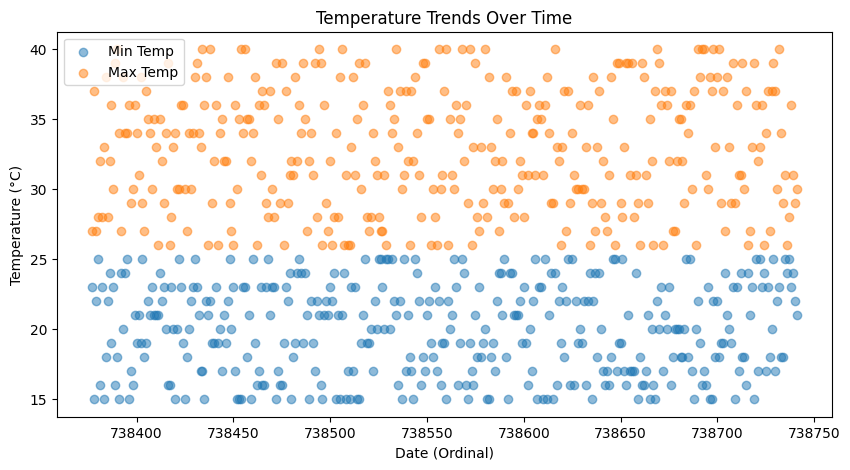

In [322]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(df['date_numeric'], df['Min_Temperature'], label="Min Temp", alpha=0.5)
plt.scatter(df['date_numeric'], df['Max_Temperature'], label="Max Temp", alpha=0.5)
plt.xlabel("Date (Ordinal)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.title("Temperature Trends Over Time")
plt.show()